<a href="https://colab.research.google.com/github/InfinityFirst/Sharable/blob/main/HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.2 MB/s eta 0:00:00


## Import Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from hmmlearn.hmm import MultinomialHMM
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [4]:
raw_file = 'traffic_accident1.csv'

columns_of_interest =  ['Collision Type',
'Weather',
'Light',
'Traffic Control',
'Driver At Fault',
'Injury Severity',
'Vehicle Going Dir',
'Speed Limit']

hidden_variable = 'Injury Severity'

observable_variable = ['Collision Type',
'Weather',
'Light',
'Traffic Control',
'Driver At Fault',
'Vehicle Going Dir',
'Speed Limit']

### Load Clean the Data

In [6]:
# Load the CSV file
df = pd.read_csv(raw_file)

# Columns to clean
columns_to_clean = columns_of_interest

# Clean the data: Convert to uppercase and strip whitespace
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.upper().str.strip()


<ipython-input-6-3c65f15ebf2e>:2: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_file)


In [ ]:
print(df.head())

### Encode Categorical Variables

In [7]:
# Use LabelEncoder to convert categorical variables to numerical form
encoders = {}
for col in columns_to_clean:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder


### Prepare Data for HMM

In [8]:
# Define observables and hidden variables
X = df[observable_variable].to_numpy()

y = df[hidden_variable].to_numpy()

# Flatten the observable data for HMM
X = X.flatten()

# Define sequence lengths (all data as a single sequence)
lengths = [len(df)]


In [12]:
# Single sequence (entire dataset treated as one sequence)
lengths = [X.shape[0]]

# Reshape data and fit the model
X_reshaped = X.reshape(-1, 1)
model.fit(X_reshaped, lengths=lengths)

# Predict the hidden states
hidden_states = model.predict(X_reshaped, lengths=lengths)
print("Hidden States:", hidden_states)


Hidden States: [2 0 2 ... 0 2 0]


### Evaluate the Model

In [14]:
# Compare predicted hidden states with the actual labels (optional, for evaluation purposes)
accuracy = accuracy_score(y, hidden_states[:len(y)])
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 39.72%


### Visualize Insights



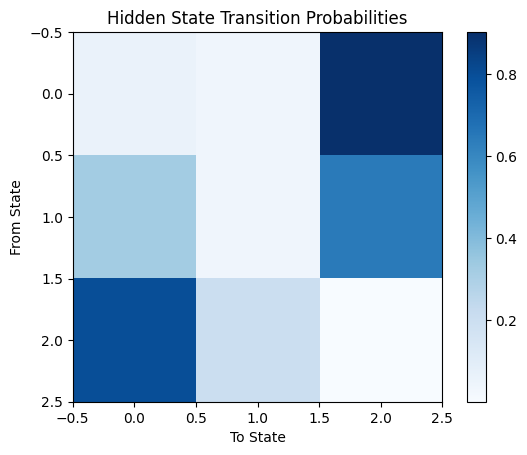

In [15]:
plt.imshow(model.transmat_, cmap='Blues', interpolation='none')
plt.colorbar()
plt.title("Hidden State Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()



### Emission Probabilities

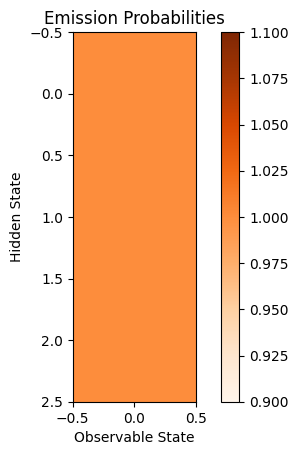

In [16]:
plt.imshow(model.emissionprob_, cmap='Oranges', interpolation='none')
plt.colorbar()
plt.title("Emission Probabilities")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()


### Correlation Heatmap

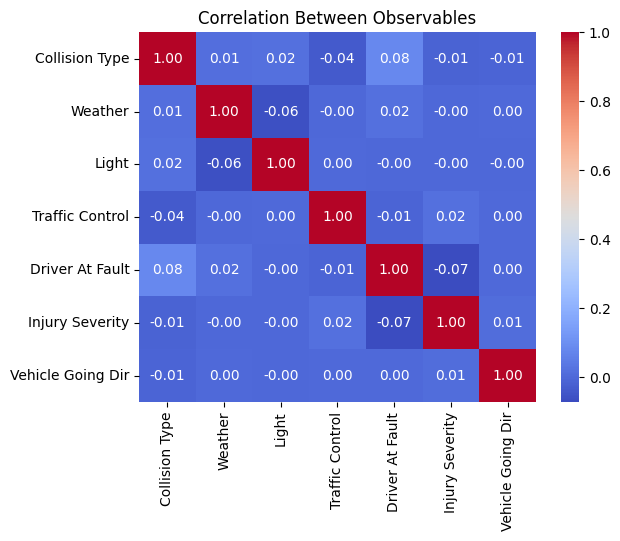

In [17]:
# Correlation heatmap of observable variables
corr_matrix = df[columns_to_clean[:-1]].corr()  # Exclude 'Injury Severity'
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Observables")
plt.show()


### Save result

In [18]:
# Save hidden states to the original DataFrame
df['Predicted Hidden State'] = hidden_states[:len(df)]

# Save to CSV
df.to_csv('hmm_results.csv', index=False)
print("Results saved to hmm_results.csv")


Results saved to hmm_results.csv
